# Support Vector Machine 

In [11]:
import pandas as pd
from sklearn.metrics import auc, precision_recall_curve, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import confusion_matrix 

# Import data 

In [12]:
# Load the data into pandas dataframes
X_train = pd.read_csv('/Users/dionnespaltman/Desktop/V6/X_train_smote_12-06-2024.csv')
y_train = pd.read_csv('/Users/dionnespaltman/Desktop/V6/y_train_smote_12-06-2024.csv')
X_test = pd.read_csv('/Users/dionnespaltman/Desktop/V6/X_test_12-06-2024.csv')
y_test = pd.read_csv('/Users/dionnespaltman/Desktop/V6/y_test_12-06-2024.csv')

In [13]:
# Drop unnamed columns 
X_train = X_train.drop(columns='Unnamed: 0', axis=1)
y_train = y_train.drop(columns='Unnamed: 0', axis=1)
X_test = X_test.drop(columns='Unnamed: 0', axis=1)
y_test = y_test.drop(columns='Unnamed: 0', axis=1)

In [14]:
columns_to_drop = ['Condition', 'Sum_456', 'Sum_1', 'Sum_2']

In [15]:
X_train = X_train.drop(columns=columns_to_drop, axis=1)
X_test = X_test.drop(columns=columns_to_drop, axis=1)

In [16]:
# Convert the DataFrame to a 1-dimensional NumPy array
y_train= y_train.values.ravel()
y_test = y_test.values.ravel()

In [17]:
# Display each dataframe to verify the loading
print("X_train:")
display(X_train)

print("\nX_test:")
display(X_test)

X_train:


,AU01_r__sum_values,AU01_r__variance,AU01_r__standard_deviation,AU01_r__maximum,AU01_r__mean,AU01_r__root_mean_square,AU02_r__sum_values,AU02_r__variance,AU02_r__standard_deviation,AU02_r__maximum,...,AU26_r__standard_deviation,AU26_r__maximum,AU26_r__mean,AU26_r__root_mean_square,AU45_r__sum_values,AU45_r__variance,AU45_r__standard_deviation,AU45_r__maximum,AU45_r__mean,AU45_r__root_mean_square
0,0.919310,0.742910,0.847697,0.293698,0.830565,0.850749,0.485652,-0.019882,0.136104,0.372241,...,-0.408243,0.425279,-0.263230,-0.352093,0.970489,0.303553,0.447869,0.118497,1.010999,0.604244
1,-0.631136,-0.940957,-1.033638,0.293698,-1.333231,-1.131787,-0.198166,-0.410164,-0.395944,0.712437,...,-0.807795,0.425279,-1.083828,-0.956263,0.265217,-0.581863,-0.586285,-0.436941,-0.690791,-0.627719
2,1.815800,0.489371,0.618471,0.293698,0.502919,0.589230,1.220328,-0.116460,0.013123,0.255859,...,-0.106153,0.338793,-0.903012,-0.467784,2.738438,0.349732,0.495312,0.760722,1.340506,0.733533
3,-1.082503,-0.947092,-1.043026,0.293698,-0.992134,-1.048249,-0.932584,-0.623317,-0.738124,0.658722,...,-1.011057,-1.321739,-0.995226,-1.029314,-0.648617,-0.463357,-0.430560,-1.235383,-0.347166,-0.420355
4,-0.468956,0.765159,0.867251,0.293698,0.251033,0.703075,-0.188708,0.531833,0.762916,0.703485,...,-0.891051,-0.716337,-0.741624,-0.842706,-0.648377,0.115383,0.249103,0.864866,0.103879,0.211850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,0.404780,-0.213730,-0.122362,0.044925,0.080427,-0.068330,0.151535,-0.241475,-0.156079,0.712437,...,0.300615,0.399711,0.416752,0.357324,0.224620,-0.040184,0.057747,0.705928,-0.190008,-0.008415
254,-0.387304,0.048483,0.186925,0.249664,-0.208703,0.074278,-0.191856,0.240390,0.421214,0.549994,...,0.653529,0.425279,0.613156,0.641681,-0.360287,-0.234234,-0.149341,-0.536546,-0.141645,-0.154002
255,0.278411,-0.036299,0.071646,0.293698,0.346129,0.150659,-0.257221,-0.271857,-0.203191,0.688110,...,0.857897,0.385795,1.021472,0.949439,-0.080333,-0.052434,0.018721,0.638470,-0.105022,-0.017082
256,1.109901,0.315526,0.453389,-0.718435,0.009169,0.330545,0.530761,-0.447359,-0.539356,-0.854875,...,-1.563444,-0.007322,-1.529979,-1.582537,2.185380,0.938926,1.060632,0.864866,0.940212,1.043909



X_test:


,AU01_r__sum_values,AU01_r__variance,AU01_r__standard_deviation,AU01_r__maximum,AU01_r__mean,AU01_r__root_mean_square,AU02_r__sum_values,AU02_r__variance,AU02_r__standard_deviation,AU02_r__maximum,...,AU26_r__standard_deviation,AU26_r__maximum,AU26_r__mean,AU26_r__root_mean_square,AU45_r__sum_values,AU45_r__variance,AU45_r__standard_deviation,AU45_r__maximum,AU45_r__mean,AU45_r__root_mean_square
0,-0.394144,0.113788,0.253906,-0.241433,0.337966,0.277798,-0.874243,-0.569907,-0.647761,-1.060162,...,0.435610,0.096632,0.288670,0.368635,-0.626277,-0.010494,0.110803,-0.141865,0.104892,0.106922
1,0.825099,-0.190659,-0.069153,0.293698,-0.123168,-0.090616,0.406467,-0.315763,-0.257869,0.712437,...,1.666168,0.425279,1.754932,1.737696,0.524330,-0.520376,-0.504625,0.864866,-0.575572,-0.536034
2,0.286661,0.569833,0.692545,-0.091596,0.683319,0.695538,-0.134549,0.036436,0.205660,-0.281293,...,-0.001568,0.425279,0.076727,0.030450,-0.968274,-0.966036,-1.148606,-2.450403,-1.112739,-1.163339
3,2.340946,0.853918,0.944420,0.293698,1.052200,0.986488,1.731736,0.006584,0.168978,-0.943779,...,2.000224,0.425279,1.243322,1.681337,1.646689,0.774393,0.910237,0.864866,0.405610,0.795791
4,-1.091775,-1.363165,-1.790147,-1.750502,-1.504745,-1.738265,-0.185078,-0.531768,-0.585279,-0.800539,...,0.880432,0.425279,0.570028,0.745445,0.147565,0.090425,0.222041,0.864866,-0.205765,0.114488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.586570,-0.251573,-0.137412,0.293698,0.077983,-0.080132,0.445783,-0.304901,-0.242420,-0.540916,...,1.589020,0.425279,1.907163,1.772730,0.511612,-0.405438,-0.356858,0.049067,-0.069567,-0.290302
80,1.352037,2.449155,2.157521,0.293698,2.139058,2.180886,1.291554,1.793664,1.905754,0.712437,...,-1.232566,-0.733634,-0.857109,-1.078772,-0.457404,-0.382910,-0.328588,-0.714660,-0.291292,-0.328794
81,-0.997972,-0.092138,0.038534,0.293698,-0.262103,-0.050299,-0.832871,-0.036330,0.115499,-0.111195,...,-1.453697,-1.166064,-1.374354,-1.450532,-0.990030,-0.145579,-0.042962,0.864866,-0.062437,-0.053038
82,-0.331540,-0.829194,-0.868273,0.293698,-0.390558,-0.740947,0.849322,0.834394,1.066122,0.712437,...,-0.839698,-0.543365,-0.677054,-0.783841,-0.145438,-0.223852,-0.134841,-0.315439,-0.185071,-0.154475


# Optimized code 

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.svm import SVC

In [19]:
def build_pipeline():
    """Builds the machine learning pipeline with RFE and SVC."""
    rfe = RFE(estimator=DecisionTreeClassifier(random_state=0))  # Recursive feature elimination with a decision tree
    model = SVC(probability=True, random_state=0)  # SVC with probability estimates
    return Pipeline(steps=[('feature_selection', rfe), ('classifier', model)])  # Pipeline combining feature selection and classification

def get_param_grid():
    """Returns the hyperparameter grid for GridSearchCV."""
    return {
        'classifier__C': [0.1, 1, 10, 100],  # Regularization parameter
        'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
        'classifier__gamma': ['scale', 'auto', 0.001, 0.01, 0.1],  # Kernel coefficient
        'classifier__class_weight': [{0: 0.75, 1: 1.49}, None],  # Class weights
        'feature_selection__n_features_to_select': [5, 10, 20, 40, 80]  # Number of features to select with RFE
    }

def perform_nested_cv(X, y, random_state=0):
    """Performs nested cross-validation and returns the test scores."""
    # Define the inner and outer cross-validation strategies
    inner_cv = KFold(n_splits=5, shuffle=True, random_state=random_state)
    outer_cv = KFold(n_splits=3, shuffle=True, random_state=random_state)
    
    pipeline = build_pipeline()  # Build the pipeline
    param_grid = get_param_grid()  # Get the hyperparameter grid
    
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=inner_cv, n_jobs=2)
    # Perform nested cross-validation
    cv_results = cross_validate(grid_search, X, y, cv=outer_cv, n_jobs=2, return_estimator=True, return_train_score=True)
    
    test_scores = cv_results['test_score']  # Extract test scores
    test_score_mean = test_scores.mean()  # Calculate mean test score
    test_score_std = test_scores.std()  # Calculate standard deviation of test scores
    
    print(f"Test scores for each fold: {test_scores}")
    
    for idx, score in enumerate(test_scores):
        print(f"Fold {idx + 1} score: {score:.3f}, SD: {test_score_std:.3f}")  # Print score and SD for each fold
    
    print(f"The mean score using nested cross-validation is: {test_score_mean:.3f} ± {test_score_std:.3f}")
    
    # Print the best parameters for each fold
    for idx, result in enumerate(cv_results['estimator']):
        print(f"Fold {idx + 1} best parameters: {result.best_params_}")
    
    return cv_results

def plot_curves(y_test, y_proba, y_pred):
    """Plots PR and ROC curves."""
    # Plot Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    auc_pr = auc(recall, precision)
    plt.figure()
    plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {auc_pr:.3f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')
    plt.show()

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_roc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_roc:.3f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.show()

def evaluate_model(cv_results, X_test, y_test):
    """Evaluates the model on the test set."""
    best_estimator_per_fold = [result.best_estimator_ for result in cv_results['estimator']]  # Get best estimator for each fold
    
    # Evaluate the best model on the test set
    best_model = best_estimator_per_fold[np.argmax(cv_results['test_score'])]  # Select the best model based on test scores
    
    print("\nEvaluating best model on test set")
    y_test_pred = best_model.predict(X_test)  # Predict on the test set
    
    print("\nClassification Report on Test Set:")
    print(classification_report(y_test, y_test_pred))  # Print classification report
    conf_matrix = confusion_matrix(y_test, y_test_pred)  # Calculate confusion matrix
    print(conf_matrix)  # Print confusion matrix
    
    y_test_proba = best_model.predict_proba(X_test)[:, 1]  # Get prediction probabilities
    plot_curves(y_test, y_test_proba, y_test_pred)  # Plot PR and ROC curves
    
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    auc_pr = auc(recall, precision)
    print(f"Test AUC-PR: {auc_pr:.3f}")  # Print AUC-PR score

    return y_test_pred

Running the code below took ... minutes. 

Test scores for each fold: [0.68604651 0.76744186 0.79069767]
Fold 1 score: 0.686, SD: 0.045
Fold 2 score: 0.767, SD: 0.045
Fold 3 score: 0.791, SD: 0.045
The mean score using nested cross-validation is: 0.748 ± 0.045
Fold 1 best parameters: {'classifier__C': 1, 'classifier__class_weight': {0: 0.75, 1: 1.49}, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf', 'feature_selection__n_features_to_select': 80}
Fold 2 best parameters: {'classifier__C': 10, 'classifier__class_weight': {0: 0.75, 1: 1.49}, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'feature_selection__n_features_to_select': 80}
Fold 3 best parameters: {'classifier__C': 10, 'classifier__class_weight': None, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf', 'feature_selection__n_features_to_select': 20}

Evaluating best model on test set

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.72      0.68      0.70        57
           1       0.40     

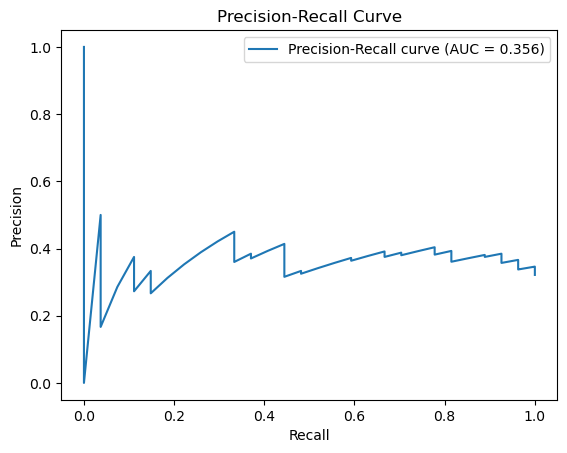

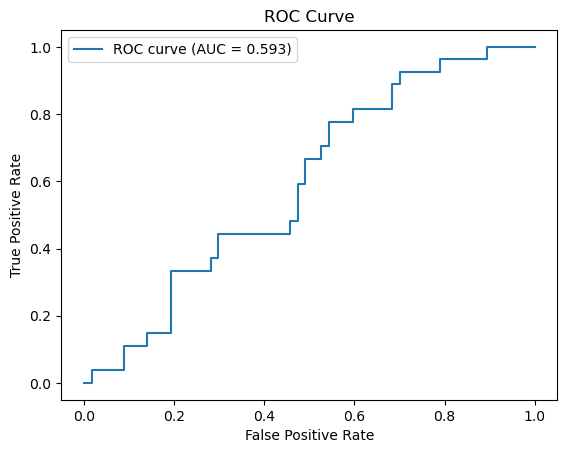

Test AUC-PR: 0.356


In [20]:
random_seed = 42

cv_results = perform_nested_cv(X_train, y_train, random_state=random_seed)  # Perform nested cross-validation
y_test_pred = evaluate_model(cv_results, X_test, y_test)  # Evaluate the model on the test set

# Confusion matrix 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

font = 'Times New Roman'
size = 18

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Set the style to a modern style
plt.style.use('seaborn-darkgrid')

# Create a custom diverging color map
colors = sns.color_palette("Blues", as_cmap=True)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=colors, cbar=False,
            annot_kws={'fontname': font, 'fontsize': size})  # Set font and size for numbers
plt.title('Support Vector Machine - Facial Action Units', fontname=font, fontsize=size)
plt.xlabel('Predicted', fontname=font, fontsize=size)
plt.ylabel('Actual', fontname=font, fontsize=size)

# SHAP

In [5]:
import pandas as pd
import os
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,5)})
plt.style.use('fivethirtyeight')

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import shap

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Using 112 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


The mean score using nested cross-validation is: 0.500 ± 0.029
{'C': 0.1, 'class_weight': {0: 0.6428571428571429, 1: 2.25}, 'gamma': 'auto', 'kernel': 'poly'}

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.22      1.00      0.36         7

    accuracy                           0.22        32
   macro avg       0.11      0.50      0.18        32
weighted avg       0.05      0.22      0.08        32

[[ 0 25]
 [ 0  7]]
AUC-PR: 0.167


  0%|          | 0/32 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


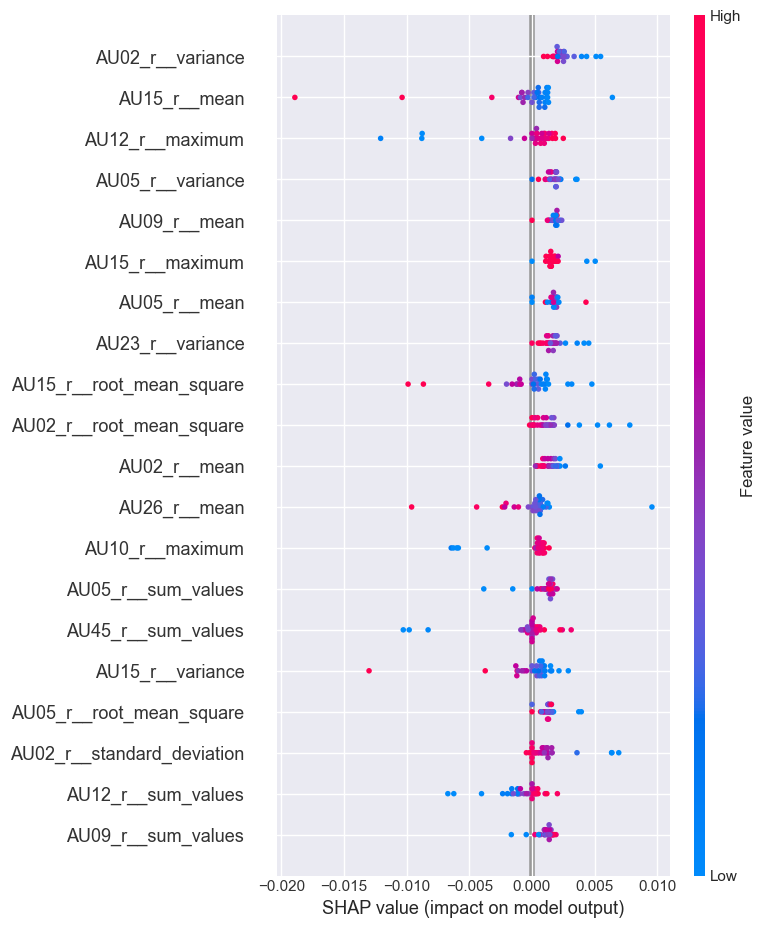

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc
import shap

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Create the pipeline with just the model (no RFE)
model = SVC(probability=True)

param_grid = {
    'C': [0.1],  # Regularization parameter
    'kernel': ['poly'],  # Kernel type
    'gamma': ['auto'],  # Kernel coefficient
    'class_weight': [{0: 0.6428571428571429, 1: 2.25}],  # Class weights
}

# Inner cross-validation for parameter search
model = GridSearchCV(
    estimator=model, param_grid=param_grid, cv=inner_cv, n_jobs=2
)

# Outer cross-validation to compute the testing score
test_score = cross_val_score(model, X_train_res, y_train_res, cv=outer_cv, n_jobs=2)
print(
    "The mean score using nested cross-validation is: "
    f"{test_score.mean():.3f} ± {test_score.std():.3f}"
)

# Fit model to training data to get best parameters
model.fit(X_train_res, y_train_res)

# Print best parameters
print(model.best_params_)

# Get the best estimator
best_model = model.best_estimator_

# Evaluate on the test set
y_pred = best_model.predict(X_test)

# Print classification report and confusion matrix
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate and print the AUC-PR
y_proba = best_model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class
precision, recall, _ = precision_recall_curve(y_test, y_proba)
auc_pr = auc(recall, precision)
print(f"AUC-PR: {auc_pr:.3f}")

# Use SHAP to explain the SVM model
explainer = shap.KernelExplainer(best_model.decision_function, X_train_res)
shap_values = explainer.shap_values(X_test)

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test, class_names=["Low VVR group", "High VVR group"])


# Error analysis

In [10]:
display(X_train_res_gender.head(5))
display(X_test_gender.head(5))

,Gender,AU01_r__sum_values,AU01_r__variance,AU01_r__standard_deviation,AU01_r__maximum,AU01_r__mean,AU01_r__root_mean_square,AU02_r__sum_values,AU02_r__variance,AU02_r__standard_deviation,...,AU26_r__standard_deviation,AU26_r__maximum,AU26_r__mean,AU26_r__root_mean_square,AU45_r__sum_values,AU45_r__variance,AU45_r__standard_deviation,AU45_r__maximum,AU45_r__mean,AU45_r__root_mean_square
0,2,-0.070220,-0.403569,-0.161650,0.428359,-0.673859,-0.387663,0.994371,0.345623,0.604597,...,-0.537730,0.225549,-1.036133,-0.951754,-1.025247,-1.526773,-1.479742,-1.237893,-2.161830,-2.049390
1,2,2.226447,1.288304,1.124217,0.514376,0.729448,1.091318,3.433959,2.208680,2.067588,...,0.774622,0.458331,0.368352,0.632011,1.209277,-0.225126,-0.001447,0.619766,-0.202961,-0.127515
2,1,-0.328541,-0.286339,-0.049149,0.514376,-0.191466,-0.152619,-0.351110,-0.286124,-0.130963,...,0.539267,0.408449,0.316323,0.450683,-0.834081,-0.909004,-0.642000,0.297037,-1.125698,-0.981679
3,2,-0.179816,1.024130,0.956659,0.514376,0.292720,0.824388,-0.176376,0.226388,0.482241,...,0.891064,0.458331,0.480862,0.766552,-0.208294,0.810246,0.749643,0.257680,0.422548,0.743912
4,2,-0.687261,-0.791730,-0.584920,0.514376,-0.763173,-0.767495,-0.530851,-0.455929,-0.383446,...,-0.558621,0.366881,-0.858611,-0.877156,-0.419249,-0.490562,-0.230352,-0.340549,-0.573360,-0.444615


,Gender,AU01_r__sum_values,AU01_r__variance,AU01_r__standard_deviation,AU01_r__maximum,AU01_r__mean,AU01_r__root_mean_square,AU02_r__sum_values,AU02_r__variance,AU02_r__standard_deviation,...,AU26_r__standard_deviation,AU26_r__maximum,AU26_r__mean,AU26_r__root_mean_square,AU45_r__sum_values,AU45_r__variance,AU45_r__standard_deviation,AU45_r__maximum,AU45_r__mean,AU45_r__root_mean_square
0,1,-1.088267,-0.486929,-0.245322,-0.094909,-0.387079,-0.373556,-0.296967,1.267608,1.407087,...,-1.106604,-1.661648,-0.939358,-1.258986,-0.862599,0.657150,0.649175,0.619766,0.540339,0.684272
1,2,0.160204,0.681681,0.725849,0.514376,0.751085,0.775827,0.031562,0.457413,0.714380,...,1.791290,0.458331,1.507769,1.887518,-0.111414,0.662918,0.653014,0.478080,0.552052,0.691181
2,1,-0.510947,-0.678086,-0.451146,-0.130749,-0.740730,-0.650167,-0.512662,-0.414737,-0.318792,...,0.412202,0.458331,-0.395816,0.012935,0.703933,1.133047,0.952462,0.619766,0.765365,1.028129
3,2,1.139765,0.115481,0.300321,0.406855,0.152945,0.239720,0.621775,-0.239594,-0.067411,...,-0.009577,0.017708,-0.227168,-0.190216,1.476715,0.191834,0.323467,0.493823,0.412243,0.350324
4,1,1.257027,1.622690,1.325337,0.514376,1.084273,1.365502,1.155021,1.601645,1.655074,...,0.075374,0.217235,-0.256234,-0.149869,-0.194813,-0.655535,-0.383937,-0.104406,-0.685164,-0.617897


In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Create the pipeline with just the model (no RFE)
model = SVC(probability=True)

param_grid = {
    'C': [0.1],  # Regularization parameter
    'kernel': ['poly'],  # Kernel type
    'gamma': ['auto'],  # Kernel coefficient
    'class_weight': [{0: 0.6428571428571429, 1: 2.25}],  # Class weights
}

# Inner cross-validation for parameter search
model = GridSearchCV(
    estimator=model, param_grid=param_grid, cv=inner_cv, n_jobs=2
)

# Check if 'gender' column exists in X_train_res
if 'gender' in X_train_res.columns:
    X_train_res_dropped = X_train_res.drop('gender', axis=1)
else:
    X_train_res_dropped = X_train_res

# Outer cross-validation to compute the testing score
test_score = cross_val_score(model, X_train_res_dropped, y_train_res, cv=outer_cv, n_jobs=2)
print(
    "The mean score using nested cross-validation is: "
    f"{test_score.mean():.3f} ± {test_score.std():.3f}"
)

# Fit model to training data to get best parameters
model.fit(X_train_res_dropped, y_train_res)

# Print best parameters
print(model.best_params_)

# Get the best estimator
best_model = model.best_estimator_

# Ensure 'gender' column is present in X_test
if 'gender' in X_test.columns:
    X_test_dropped = X_test_gender.drop('Gender', axis=1)
else:
    X_test_dropped = X_test

# Evaluate on the test set
y_pred = best_model.predict(X_test_dropped)

# Print classification report and confusion matrix
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate and print the AUC-PR
y_proba = best_model.predict_proba(X_test_dropped)[:, 1]  # Get the probabilities for the positive class
precision, recall, _ = precision_recall_curve(y_test, y_proba)
auc_pr = auc(recall, precision)
print(f"AUC-PR: {auc_pr:.3f}")

# Error analysis for gender
gender_labels = X_test_gender['Gender']  # Ensure 'gender' is present in X_test_gender
male_indices = (gender_labels == 1)
female_indices = (gender_labels == 2)

# Extract true and predicted labels for male and female samples
y_test_male = y_test[male_indices]
y_pred_male = y_pred[male_indices]

y_test_female = y_test[female_indices]
y_pred_female = y_pred[female_indices]

# Generate confusion matrix for males and females
confusion_matrix_male = confusion_matrix(y_test_male, y_pred_male)
confusion_matrix_female = confusion_matrix(y_test_female, y_pred_female)

# Print confusion matrices
print("\nConfusion Matrix for Males:")
print(confusion_matrix_male)

print("\nConfusion Matrix for Females:")
print(confusion_matrix_female)

# Print classification reports for males and females
print("\nClassification Report for Males:")
print(classification_report(y_test_male, y_pred_male))

print("\nClassification Report for Females:")
print(classification_report(y_test_female, y_pred_female))



The mean score using nested cross-validation is: 0.500 ± 0.029
{'C': 0.1, 'class_weight': {0: 0.6428571428571429, 1: 2.25}, 'gamma': 'auto', 'kernel': 'poly'}

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.22      1.00      0.36         7

    accuracy                           0.22        32
   macro avg       0.11      0.50      0.18        32
weighted avg       0.05      0.22      0.08        32

[[ 0 25]
 [ 0  7]]
AUC-PR: 0.167

Confusion Matrix for Males:
[[ 0 15]
 [ 0  2]]

Confusion Matrix for Females:
[[ 0 10]
 [ 0  5]]

Classification Report for Males:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.12      1.00      0.21         2

    accuracy                           0.12        17
   macro avg       0.06      0.50      0.11        17
weighted avg       0.01      0.12      0.

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined an

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


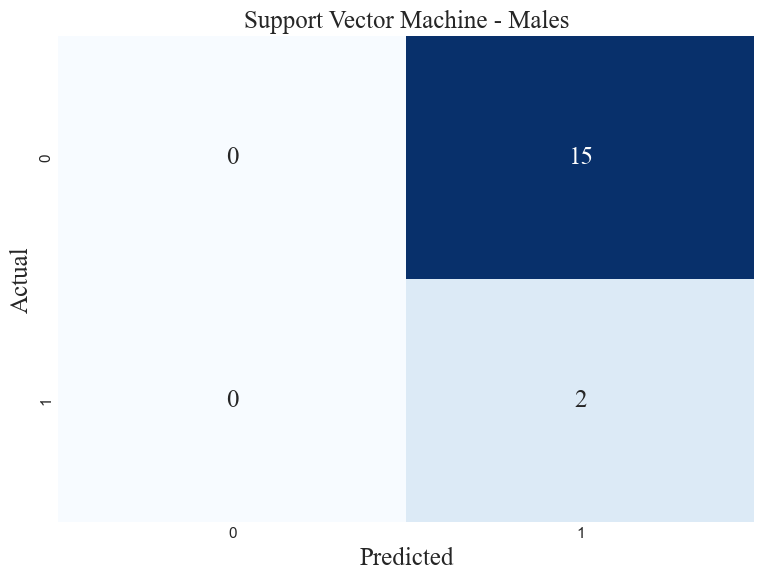

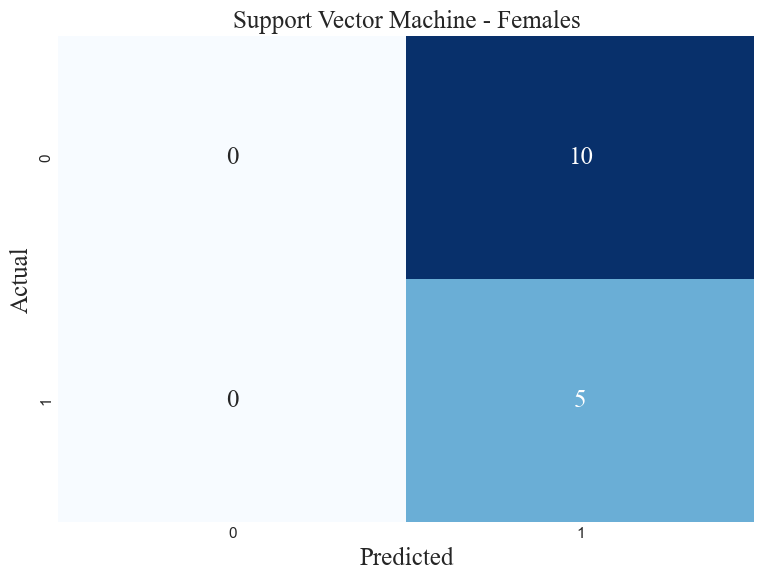

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

font = 'Times New Roman'
size = 18

# Calculate confusion matrices for overall, males, and females
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_male = confusion_matrix(y_test_male, y_pred_male)
conf_matrix_female = confusion_matrix(y_test_female, y_pred_female)

# Set the style to a modern style
plt.style.use('seaborn-darkgrid')
# Create a custom diverging color map
colors = sns.color_palette("Blues", as_cmap=True)

# # Plot overall confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=colors, cbar=False,
#             annot_kws={'fontname': font, 'fontsize': size})  # Set font and size for numbers
# plt.title('Support Vector Machine - Overall', fontname=font, fontsize=size)
# plt.xlabel('Predicted', fontname=font, fontsize=size)
# plt.ylabel('Actual', fontname=font, fontsize=size)
# plt.show()

# Plot confusion matrix for males
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_male, annot=True, fmt='d', cmap=colors, cbar=False,
            annot_kws={'fontname': font, 'fontsize': size})  # Set font and size for numbers
plt.title('Support Vector Machine - Males', fontname=font, fontsize=size)
plt.xlabel('Predicted', fontname=font, fontsize=size)
plt.ylabel('Actual', fontname=font, fontsize=size)
plt.show()

# Plot confusion matrix for females
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_female, annot=True, fmt='d', cmap=colors, cbar=False,
            annot_kws={'fontname': font, 'fontsize': size})  # Set font and size for numbers
plt.title('Support Vector Machine - Females', fontname=font, fontsize=size)
plt.xlabel('Predicted', fontname=font, fontsize=size)
plt.ylabel('Actual', fontname=font, fontsize=size)
plt.show()
